# Final exam

In [1]:
from numpy import linalg

## Problem 01

A Lambertian wall (width = a, height = b) with radiance L is at a right
angle with the black floor (width = a, depth = c). What is the surface
irradiance at the center of the floor (a/2, c/2)? Neglect all other 
surrounds.

### Solution:

The unit area $dA$ at the center of the floor has a solid angle $d\omega$ with respect to a point $(x,y)$ on the wall:

$$
d\omega = \frac{dA \cos\theta}{(c/2)^2 + y^2 + (a/2 - x)^2},
$$
where $\cos\theta = y/\sqrt{(c/2)^2 + y^2 + (a/2 - x)^2}$.

The the total flux 

\begin{align}
\Phi &= \int_0^a\int_0^b d\omega \cos\theta\, L\, dy\, dx \\
 &= \int_0^a\int_0^b \frac{L\,dA\, y}{[(c/2)^2 + y^2 + (a/2-x)^2]^{3/2}}\, dy\, dx
\end{align}

The integral

\begin{align}
\int_0^b (\alpha^2 + y^2)^{-3/2} y\, dy &= -(\alpha^2 + y^2)^{-1/2}\big\vert_0^b \\
 &= \frac{1}{\sqrt{\alpha^2}} - \frac{1}{\sqrt{\alpha^2+b^2}}
\end{align}

Let $\alpha = (c/2)^2 + (a/2-x)^2$, the total flux is then

$$
\Phi = L\,dA \int_0^a\Big[\frac{1}{\sqrt{(c/2)^2+(a/2-x)^2}} - \frac{1}{\sqrt{(c/2)^2+b^2+(a/2-x)^2}}\Big]\, dx
$$

The integral

\begin{align}
\int_0^a [(a/2-x)^2 + \beta^2]^{-1/2} dx &= \int_{-a/2}^{a/2} (x^2+\beta^2)^{-1/2} dx \\
&= \ln(\sqrt{x^2+\beta^2} + x) \big\vert_{-a/2}^{a/2}\\
&= \ln\Big(\frac{\sqrt{(a/2)^2+\beta^2}+a/2}{\sqrt{(a/2)^2+\beta^2}-a/2}\Big) \\
&= \ln\Big(\frac{[\sqrt{(a/2)^2+\beta^2}+a/2]^2}{(a/2)^2 + \beta^2 - (a/2)^2} \Big)\\
&= \ln\Big(\frac{a^2/2 + a\sqrt{(a/2)^2+\beta^2}}{\beta^2}\Big) \\
&= \ln\Big(\frac{a^2 + a\sqrt{a^2+4\beta^2}}{2\beta^2}   \Big)
\end{align}

Therefore the irradiance is

\begin{align}
\Phi/dA &= L \Big\{\ln\Big(\frac{a^2+a\sqrt{a^2+4(c/2)^2}}{2(c/2)^2}\Big) -
    \ln\Big(\frac{a^2+a\sqrt{a^2+4(c/2)^2+b^2}}{2(c/2)^2+2b^2} \Big)\Big\} \\
&= L\Big\{\ln\Big(\frac{a^2+a\sqrt{a^2+c^2}}{c^2}\Big) - \ln\Big(\frac{a^2+a\sqrt{a^2+b^2+c^2}}{c^2+4b^2}\Big)   \Big\}
\end{align}

## Problem 02
Given a monitor with the following corresponding chromaticity pairs:

<pre>
phosphor     r      g      b         x       y       z
  red        1      0      0        0.61    0.36    0.03
  green      0      1      0        0.28    0.60    0.12
  blue       0      0      1        0.18    0.09    0.73
  white     1/3    1/3    1/3       0.3027  0.3281  0.3692
</pre>

Determine the spectral sensitivity functions of the camera whose raw RGB
can be sent to this monitor without color correction.


### Solution

The camera sensitivity functions are the color matching functions for the (R), (G), (B) primaries of the display. First we find the matrix that transforms the tristimulus values for (R), (G), (B) primaries to the tristimulus values for (X), (Y), (Z) primaries, calculated based on the four corresponding chromaticity points (p.97 of the text book).

In [2]:
def primaries_conversion(xyzs, rgbs, normalizerow=1):
    '''
    Return a 3x3 matrix A so that the tristimulus values [X,Y,Z] for the primaries (X), (Y), (Z)
    can be transformed from the tristimulus values [R,G,B] for the primaries (R), (G), (B) via
    [X,Y,Z]^T = A [R,G,B]^T.
    Parameters:
    -----------
    xyzs: array-like, containing 4 2-tuples [(x1,y1), (x2,y2), (x3,y3), (x4,y4)] representing 
          4 chromaticity coordinates for the primaries (X), (Y), (Z).
    rgbs: array-like, containing 4 2-tuples [(r1,g1), (r2,g2), (r3,g3), (r4,g4)] representing 
          the corresponding chromaticity coordinates for the primaries (R), (G), (B).
    normalizerow: integer, the row number that will be normalized, ie., the sum of that row will be one.
                  Default = 1, the middle row.
    '''
    if np.shape(xyzs) != (4,2) or np.shape(rgbs) != (4,2):
        raise ValueError('Both arguments must be in shape (4,2)')
    X = np.zeros((4,3))
    X[:,:2] = np.asarray(xyzs)
    X[:,2] = 1-X.sum(axis=1)
    R = np.zeros((4,3))
    R[:,:2] = np.asarray(rgbs)
    R[:,2] = 1-R.sum(axis=1)
    V = np.matrix(X[:3]).transpose()
    U = np.matrix(R[:3]).transpose()
    alpha = linalg.inv(U).dot(R[3])
    beta = linalg.inv(V).dot(X[3])
    D = np.zeros((3,3))
    np.fill_diagonal(D, beta/alpha)
    #
    A = V.dot(D.dot(linalg.inv(U)))
    A /= A[normalizerow].sum()
    return A
#
def print_matrix(m):
    for r in np.asarray(m):
        print('{:.4f}   {:.4f}   {:.4f}'.format(*r))

In [3]:
A = primaries_conversion([(0.61,0.36),(0.28,0.60),(0.18,0.09),(0.3027,0.3281)],[(1,0),(0,1),(0,0),(1/3,1/3)])
print('The conversion matrix from RGB to XYZ is')
print_matrix(A)

The conversion matrix from RGB to XYZ is
0.3748   0.3073   0.2404
0.2212   0.6586   0.1202
0.0184   0.1317   0.9751


In [4]:
iA = linalg.inv(A)
for i,c in enumerate('rgb'):
    fstr = '\\bar{{{{{:s}}}}}(\lambda)'.format(c)
    fstr += ' &= {:+.4f}\,\\bar{{x}}(\lambda)  {:+.4f}\,\\bar{{y}}(\lambda)  {:+.4f}\,\\bar{{z}}(\lambda)'
    print(fstr.format(iA[i,0],iA[i,1],iA[i,2]), '\\\\')

\bar{r}(\lambda) &= +3.6156\,\bar{x}(\lambda)  -1.5471\,\bar{y}(\lambda)  -0.7008\,\bar{z}(\lambda) \\
\bar{g}(\lambda) &= -1.2323\,\bar{x}(\lambda)  +2.0841\,\bar{y}(\lambda)  +0.0469\,\bar{z}(\lambda) \\
\bar{b}(\lambda) &= +0.0981\,\bar{x}(\lambda)  -0.2523\,\bar{y}(\lambda)  +1.0324\,\bar{z}(\lambda) \\


The color matching functions are then the linear combination of $\bar{x}(\lambda$, $\bar{y}(\lambda)$, $\bar{z}(\lambda)$ with the coefficients equal to the inverse of the above matrix:

\begin{align}
\bar{r}(\lambda) &= +3.6156\,\bar{x}(\lambda)  -1.5471\,\bar{y}(\lambda)  -0.7008\,\bar{z}(\lambda) \\
\bar{g}(\lambda) &= -1.2323\,\bar{x}(\lambda)  +2.0841\,\bar{y}(\lambda)  +0.0469\,\bar{z}(\lambda) \\
\bar{b}(\lambda) &= +0.0981\,\bar{x}(\lambda)  -0.2523\,\bar{y}(\lambda)  +1.0324\,\bar{z}(\lambda)
\end{align}

The CIE 1931 color matching functions looks like the following

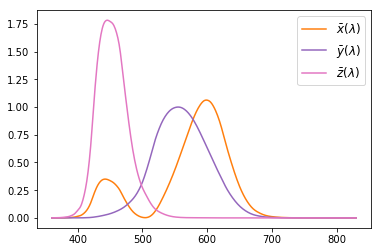

In [5]:
ciexyz31_1 = np.loadtxt('ciexyz31_1.csv', delimiter=',')
plt.plot(ciexyz31_1[:,0], ciexyz31_1[:,1], label=r'$\bar{x}(\lambda)$', color='C1')
plt.plot(ciexyz31_1[:,0], ciexyz31_1[:,2], label=r'$\bar{y}(\lambda)$', color='C4')
plt.plot(ciexyz31_1[:,0], ciexyz31_1[:,3], label=r'$\bar{z}(\lambda)$', color='C6')
plt.legend(fontsize='large');

After the transformation, we obtain the color matching functions:

In [6]:
rbar = iA[0,0]*ciexyz31_1[:,1] + iA[0,1]*ciexyz31_1[:,2] + iA[0,2]*ciexyz31_1[:,3]
gbar = iA[1,0]*ciexyz31_1[:,1] + iA[1,1]*ciexyz31_1[:,2] + iA[1,2]*ciexyz31_1[:,3]
bbar = iA[2,0]*ciexyz31_1[:,1] + iA[2,1]*ciexyz31_1[:,2] + iA[2,2]*ciexyz31_1[:,3]

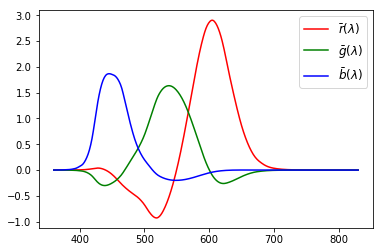

In [7]:
plt.plot(ciexyz31_1[:,0], rbar, label=r'$\bar{r}(\lambda)$', color='r')
plt.plot(ciexyz31_1[:,0], gbar, label=r'$\bar{g}(\lambda)$', color='g')
plt.plot(ciexyz31_1[:,0], bbar, label=r'$\bar{b}(\lambda)$', color='b')
plt.legend(fontsize='large');